In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#handling default matplotlib values
plt.rcParams['figure.figsize'] = (12,6)

Only 2 features will be considered, Mean distance driven per day, Mean percentage of times of when driver drove 5 miles over the speed limit

In [4]:
#read to database to inspect data
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
#checking number of columns in total/missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
#importing KMeans
from sklearn.cluster import KMeans

In [10]:
#cluster number will be 2 since that is the minimum number to exist in a dataset
kmeans = KMeans(n_clusters = 2)

#dropping id since there is no contribution to the overall model
df_analyze = df.drop('id', axis = 1)

In [11]:
#fit onto dataset
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [13]:
#determining vector for cluster centroids
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [14]:
#checking labels and length
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [17]:
#checking how many unique drivers there are in both clusters
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts = True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


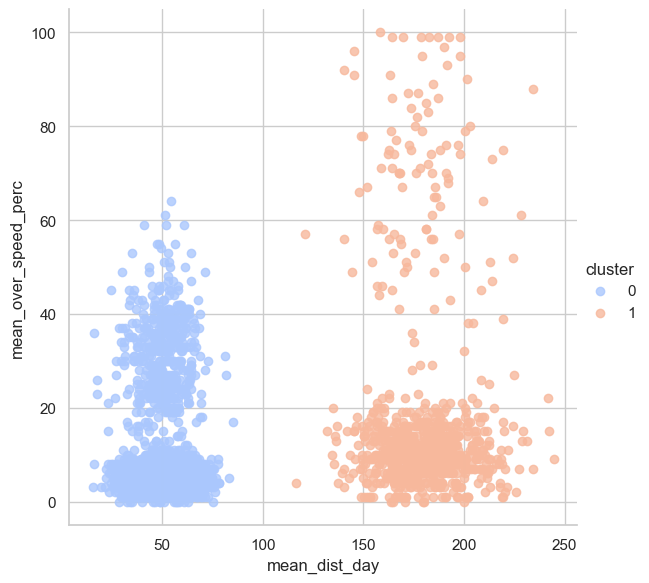

In [23]:
#assigning cluster labels to new column in dataframe
df_analyze['cluster'] = kmeans.labels_

#printing grid
sns.set_style('whitegrid')

#mean dist day on x axis and mean over speed perc on y axis
sns.lmplot(x = 'mean_dist_day', y = 'mean_over_speed_perc', data = df_analyze
            , hue = 'cluster', palette = 'coolwarm', height = 6, aspect = 1, fit_reg = False)


In [25]:
#trying out model with 4 clusters (expected to have more optimized model)
kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(df.drop('id', axis = 1))
kmeans_4.fit(df.drop('id', axis = 1))
print(kmeans_4.cluster_centers_)

#tracking unique labels
unique,counts = np.unique(kmeans_4.labels_,return_counts = True)

#zipping unique number of clusters and frequency count within dictionary
kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 50.40482436  32.36533958]
 [180.34311782  10.52011494]
 [ 49.99263253   5.20447169]
 [177.83509615  70.28846154]]
{0: 427, 1: 696, 2: 2773, 3: 104}


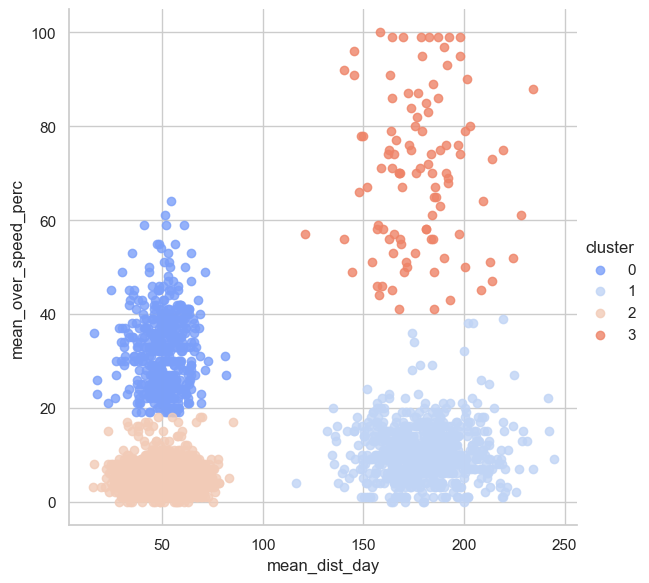

In [28]:
df_analyze['cluster'] = kmeans_4.labels_


sns.set_style('whitegrid')
sns.lmplot(x = 'mean_dist_day', y = 'mean_over_speed_perc', data = df_analyze
            , hue = 'cluster', palette = 'coolwarm', height = 6, aspect = 1, fit_reg = False)

It is more denser and more optimal compared to the 2 cluster plot